# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
df = df_dsa

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
office_supplies = df[df['Categoria'] == 'Office Supplies']

#poderia ter utilizado o idxmax para trazer o valor com o maior indice.
cidade_com_mais_valor_venda = office_supplies[['Cidade', 'Valor_Venda']].groupby('Cidade').sum().sort_values(by=['Valor_Venda'], ascending=False)


print(cidade_com_mais_valor_venda.head(1))

print(cidade_com_mais_valor_venda.tail(1))

               Valor_Venda
Cidade                    
New York City    68362.814
         Valor_Venda
Cidade              
Abilene        1.392


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

Data_Pedido
2015-03-18    28106.7160
2017-10-02    18452.9720
2018-10-22    15158.8770
2018-03-23    14816.0680
2015-09-08    14228.4280
2018-11-17    13408.7928
2017-12-17    12185.1340
2015-11-17    11544.2740
2016-09-17    11525.0060
2018-11-04    10663.7960
Name: Valor_Venda, dtype: float64


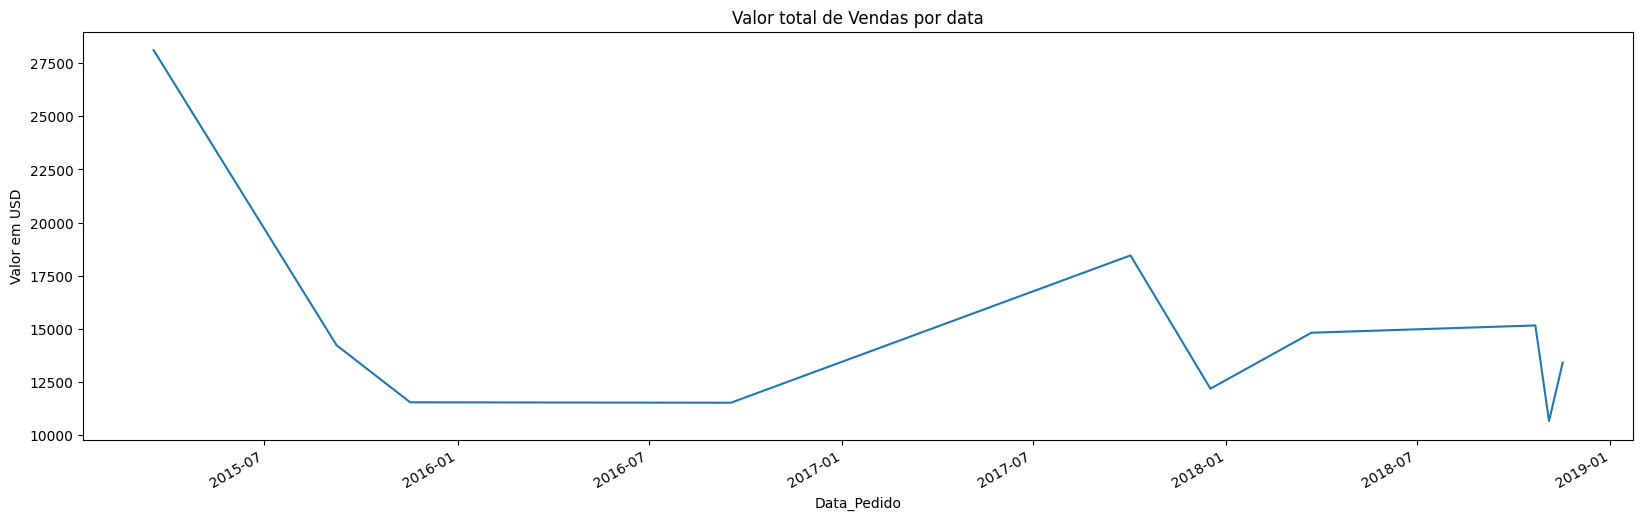

In [15]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format = "%d/%m/%Y")

total_vendas_por_dia = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_values(ascending=False).head(10)

print(total_vendas_por_dia)

plt.figure(figsize = (20,6))
plt.title('Valor total de Vendas por data')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor em USD')
total_vendas_por_dia.plot(x = 'Data_Pedido', y = 'Valor_Venda', label = 'vendas')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

         Estado  Valor_Venda
0    California  442927.0975
1      New York  304536.4010
2         Texas  163549.8602
3    Washington  133826.0060
4  Pennsylvania  114411.6800
5       Florida   88043.7000
6      Illinois   78109.9270
7      Michigan   76081.1740
8          Ohio   74277.8020
9      Virginia   68194.6700


[Text(0, 0, '442927'),
 Text(0, 0, '304536'),
 Text(0, 0, '163550'),
 Text(0, 0, '133826'),
 Text(0, 0, '114412'),
 Text(0, 0, '88043.7'),
 Text(0, 0, '78109.9'),
 Text(0, 0, '76081.2'),
 Text(0, 0, '74277.8'),
 Text(0, 0, '68194.7')]

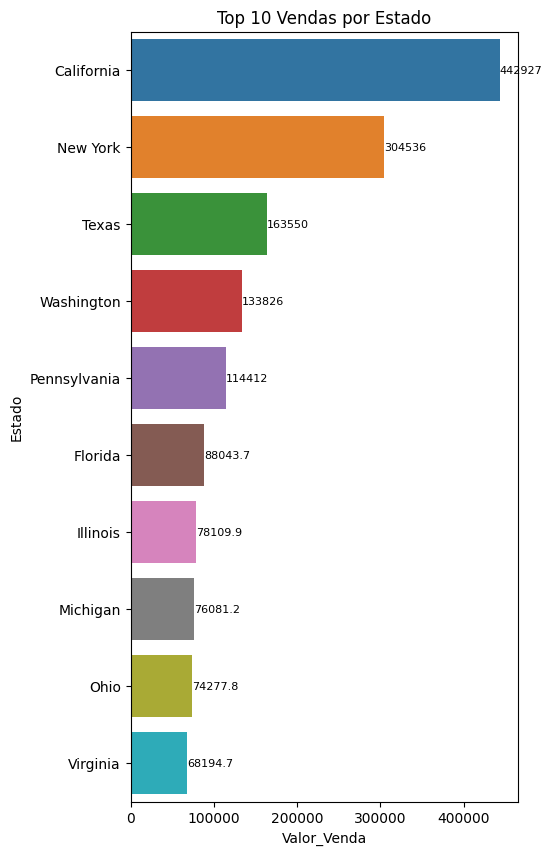

In [16]:
df.head()

vendas_por_estado = df.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).head(10).reset_index()
print(vendas_por_estado)

plt.figure(figsize = (5, 10))

#FEITO COM PANDAS
# vendas_por_estado.plot(kind = 'bar', color = 'g')
plt.title('Top 10 Vendas por Estado')
ax = sns.barplot(data = vendas_por_estado, y = 'Estado', x = 'Valor_Venda', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=8)

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

          Cidade  Valor_Venda
0  New York City   251749.219
1    Los Angeles   171654.633
2        Seattle   114725.478
3  San Francisco   107489.952
4   Philadelphia   107197.803


[Text(0, 0, '251749'),
 Text(0, 0, '171655'),
 Text(0, 0, '114725'),
 Text(0, 0, '107490'),
 Text(0, 0, '107198')]

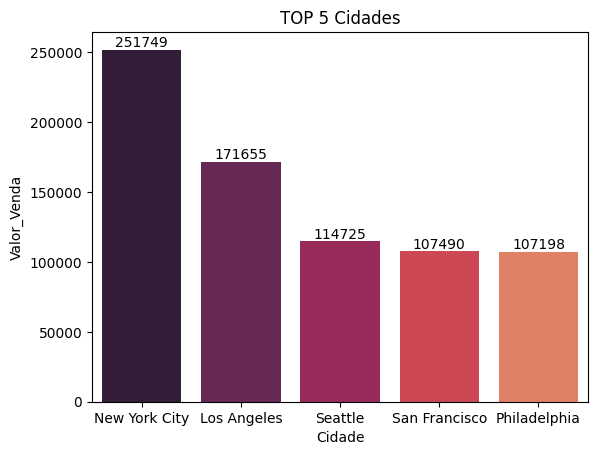

In [17]:
top5_cidades_com_mais_vendas = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(5).reset_index()

print(top5_cidades_com_mais_vendas)
plt.title('TOP 5 Cidades')
sns.set_palette('rocket')
ax = sns.barplot(data = top5_cidades_com_mais_vendas, x = 'Cidade', y = 'Valor_Venda')
ax.bar_label(ax.containers[0])

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


([<matplotlib.patches.Wedge at 0x187accc8ac0>,
 [Text(-0.025944516297952087, 1.1497073027836544, 'Consumer'),
  Text(-0.605479269126948, -0.9422286636785664, 'Corporate'),
  Text(0.9283289641368655, -0.6265822646265808, 'Home Office')],
 [Text(-0.014664291820581613, 0.649834562442935, '51%'),
  Text(-0.33517602398098906, -0.5215908673934921, '30%'),
  Text(0.5138963908614791, -0.3468580393468572, '19%')])

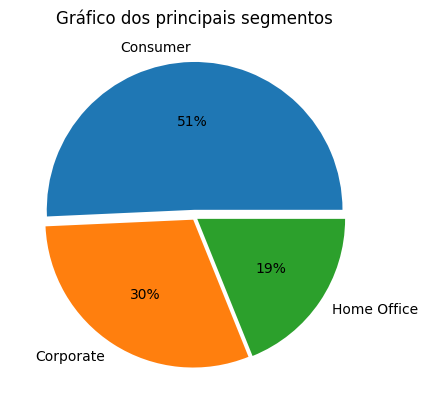

In [18]:
df.head()
principal_segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()

print(principal_segmento)

sns.set_palette('tab10')
plt.title('Gráfico dos principais segmentos')
plt.pie(x = principal_segmento['Valor_Venda'], labels = principal_segmento['Segmento'] , autopct='%.0f%%', explode = (0.05, 0.02, 0.02))

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [19]:

df["year"] = df['Data_Pedido'].dt.year

segmento_ano_mais_vendido = df.groupby(['year', 'Segmento'])['Valor_Venda'].sum()

segmento_ano_mais_vendido


year  Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [20]:
df['Desconto'] = np.where(df['Valor_Venda']>= 1000, 0.15, 0.1)

df['Desconto'].value_counts()

# 457 receberam 15% desconto

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [21]:
df = df.rename(columns={"Valor_Venda": "Valor_Venda_Antes", "year": "Ano"})

df["Valor_Venda_Depois"] = df["Valor_Venda_Antes"] * (1 - df["Desconto"])

antes_15_pct = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Antes'].mean()
depois_15_pct = df.loc[ df['Desconto'] == 0.15, 'Valor_Venda_Depois'].mean()

print(f"""
valor de venda ANTES dos 15% aplicado: {round(antes_15_pct, 2)}
valor de venda DEPOIS dos 15% aplicado: {round(depois_15_pct, 2)}
""")

df.shape


valor de venda ANTES dos 15% aplicado: 2116.81
valor de venda DEPOIS dos 15% aplicado: 1799.29



(9700, 14)

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

                            mean         sum
Ano  Mes Segmento                           
2015 1   Consumer     146.736787   6896.6290
         Corporate    130.886769   1701.5280
         Home Office  329.855882   5607.5500
     2   Consumer     117.327926   3167.8540
         Corporate     69.235333    623.1180
...                          ...         ...
2018 11  Corporate    341.215278  44357.9862
         Home Office  247.519423  24009.3840
     12  Consumer     183.616244  48107.4558
         Corporate    153.167403  20524.4320
         Home Office  224.523983  13022.3910

[144 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

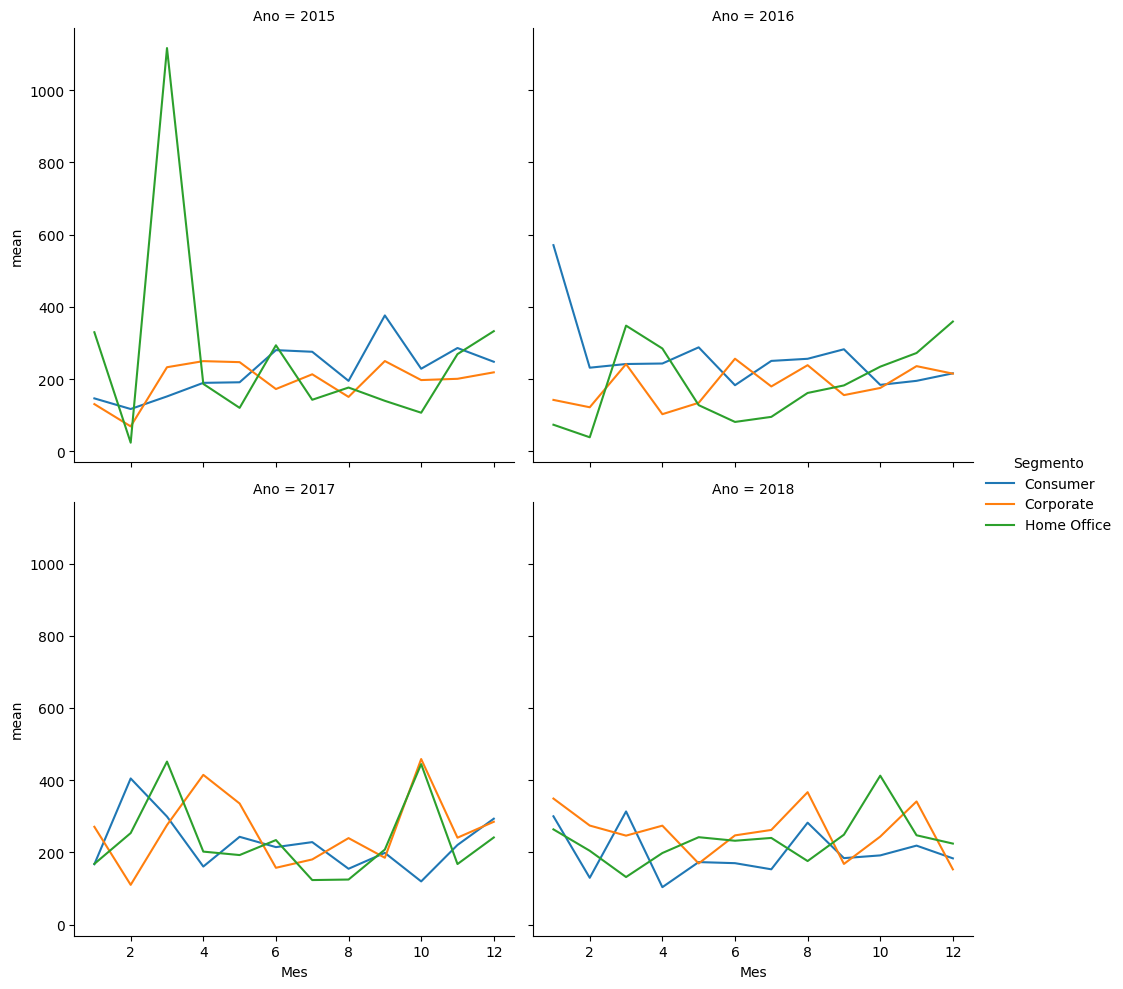

In [49]:
df['Mes'] = df['Data_Pedido'].dt.month


media_vendas = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda_Antes'].agg([np.mean, np.sum])

print(media_vendas)

#extraindo níveis do gráfico
anos = media_vendas.index.get_level_values(0)
meses = media_vendas.index.get_level_values(1)
segmentos = media_vendas.index.get_level_values(2)

#plotando
plt.figure(figsize = (12, 6))
fig1 = sns.relplot(kind = 'line', data = media_vendas, y = 'mean', x = meses, hue = segmentos, col = anos, col_wrap = 2)


## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [57]:

#agrupamento por categoria e subcategoria
df_dsa_p10 = df.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda_Antes',
                                                                                   ascending = False).head(12)
# agrupamento por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda_Antes']].astype(int).sort_values(by = 'Categoria').reset_index()

In [61]:
#criando o gráfico de categorias
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [59]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

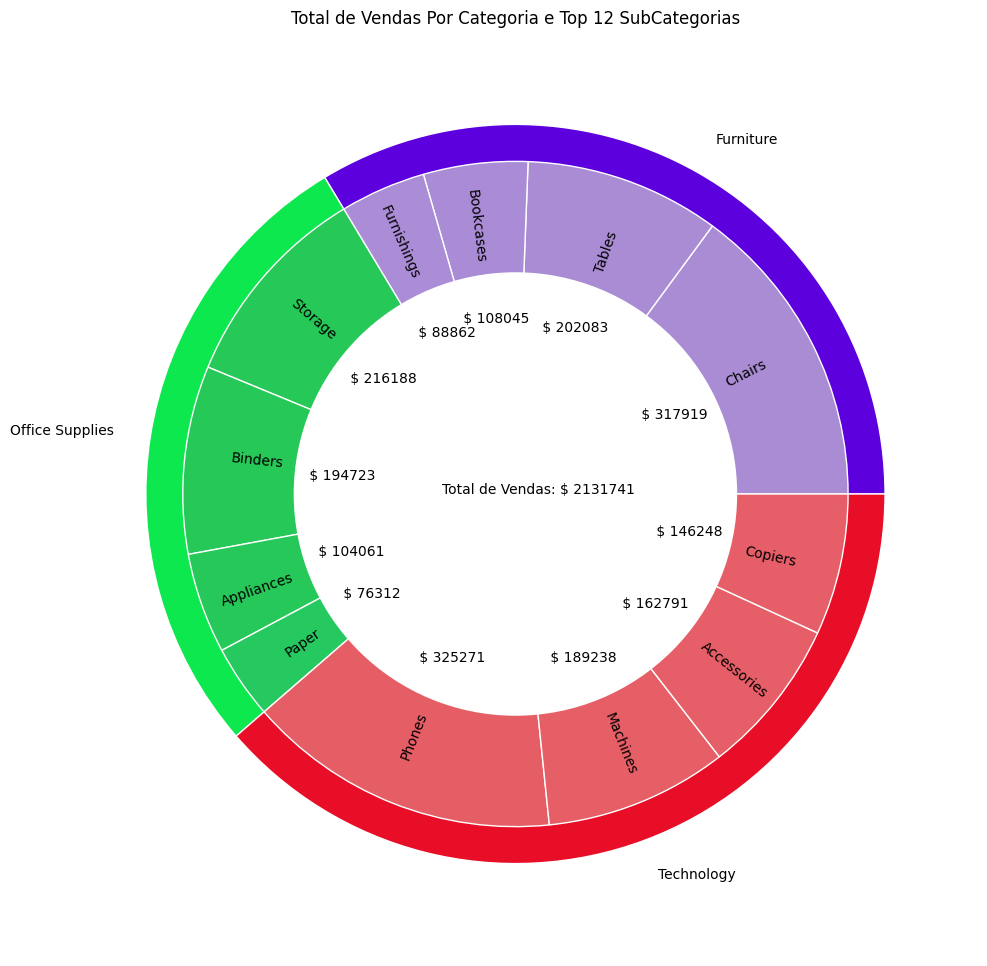

In [64]:
# função autopct
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda_Antes'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda_Antes'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda_Antes']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda_Antes']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim